# Bifurcation diagram

In this figure we show the position and stability of the fixed points of $G$ as a function of the duration of the growth phase $T$. Then we look at the influence of the Bottlneck size $B$ on the position of the critical $T^*$.

In [1]:
from collections import OrderedDict
import numpy as np 
import matplotlib.pyplot as plt
import estaudel.heredity.deterministic as ehd
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

# Parameters

In [2]:
K = 1500
B = 15
r = np.array([14,22])
A = np.array([[0.8,0.01],
              [0.5,0.3]])/K

# Bifurcation diagram on $T$ via natural parameter continuation

In [3]:
asymptotic_pstar = ehd.pstar(A)
g = ehd.get_gfunc(r,A,B)
t,pstar = ehd.continuation_on_T(g, t0=1, tf=1e-3, start=asymptotic_pstar)
stab = ehd.stability_of_01(g, t0=1, tf=1e-3)
tstar = ehd.tstar(r, A, B, precise=True)

/home/guilhem/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)


# Effect of bottleneck size

In [4]:
pstar_of_b = []
tstar_of_b = []
Blist = np.linspace(1,500,100)
for B in Blist:
    g = ehd.get_gfunc(r,A,B)
    times_of_b,ps = ehd.continuation_on_T(g, t0=1, tf=1e-3, start=asymptotic_pstar)
    pstar_of_b.append(ps)
    tstar_of_b.append(ehd.tstar(r, A, B, precise=False))
    num_tstar_of_b.append(ehd.tstar(r, A, B, precise=True))

/home/guilhem/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)
/home/guilhem/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


# Plot

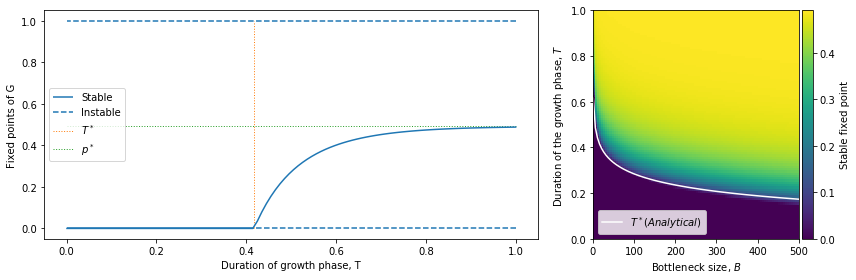

In [17]:
fig = plt.figure(figsize=(12,4))
ax = plt.subplot2grid((1,3),(0,0),1,2)
for k,v in stab.items():
    for seg in v:
        ax.hlines(k,seg[1][0],seg[1][1],
                  linestyles='-' if seg[0] else '--',
                  color='C0',
                  label='Stable' if seg[0] else 'Instable')


ax.vlines(tstar,0,1, linestyles=':', lw=1,color='C1', label='$T^*$')
ax.hlines(asymptotic_pstar,0,1, linestyles=':',lw=1, color='C2', label='$p^*$')


ax.plot(t,pstar, color='C0',label='Stable')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='center left')
ax.set(ylabel='Fixed points of G', xlabel='Duration of growth phase, T')


def colorbar(mappable,label=None):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax, label=label)

ax = plt.subplot2grid((1,3),(0,2))
im = ax.imshow(np.array(pstar_of_b).transpose(), 
               aspect='auto',
               extent=[Blist.min(),Blist.max(),0,times_of_b.max()])
colorbar(im,'Stable fixed point')
ax.plot(Blist,tstar_of_b, color='white', label='$T^* (Analytical)$')
#ax.plot(Blist,num_tstar_of_b, color='white', ls='--', label='$T^* (Numerical)$')

ax.legend(loc='lower left')
ax.set(ylabel='Duration of the growth phase, $T$', xlabel='Bottleneck size, $B$')


plt.tight_layout()
fig.savefig('bifurcation.pdf', bbox_to_inches='tight')